# Redes Neuronales Artificiales *(ANN)*: Explicación con ejemplos

## [Parte 1: Datos y Arquitectura]

¿Qué tal si queremos predecir qué calificación tendremos en base a la cantidad de horas que dormimos y estudiamos?
Tenemos los datos y haremos un modelo que nos ayude a predecir qué tan bien nos irá en el examen en base al número de horas de sueño y estudio.

__Problema de Regresión Supervisada__

>Es supervisado porque sus ejemplos tienen inputs y outputs; y es una regresión porque estamos prediciendo un test score, que es un output continuo (1 al 100). 
>>Si por el contrario se estuviera prediciendo la calificación de letra (A, B, C, D) entonces el problema sería de clasificación.

En ML hay muchos modelos, pero aquí usaremos una red neuronal artificial (*Artificial Neural Network o ANN*). Se basan básicamente en el funcionamiento de las neuronas y han sido usadas para problemas pesados de clasificación, como: 
1. Clasificación de Imágenes
2. Procesamiento natural del lenguaje

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [2]:
#Horas de sueño, Horas de estudio  / Sleeping hours, studying hours
x= np.array(([3,5],[5,1], [10,2]), dtype=float)

#Calificaciones / Grades
y= np.array(([75],[82],[93]), dtype=float)

print(f"Sleeping hours, studying hours = {x}")
print("-----------------------")
print(f"Grades = {y}")

Sleeping hours, studying hours = [[ 3.  5.]
 [ 5.  1.]
 [10.  2.]]
-----------------------
Grades = [[75.]
 [82.]
 [93.]]


Antes de hacer el modelo, tenemos que tomar en cuenta que las unidades de nuestro ejemplo son distintas. La X tiene valores en horas y la Y en una fracción de calificación que va de 0 a 100.
Vamos a __escalar__ el data (Scale) -> Para estandarizar las unidades.
Para hacerlo vamos a tomar en cuenta que toda nuestra data es positiva y que puede dividirse entre el valor maximo de X y de Y, lo que efectivamente escalará nuestros datos entre 0 y 1. 

In [3]:
x= x/np.amax(x, axis=0)  #Esto se podría re-escalear con un maximo de 24 hrs (?), eje 0 columna, eje 1 renglones
#Broadcasting= habilidad para acoplar cosas de distintos tamaños. Dividir un array de 2,3 entre algo de 2,1
#Si le diera algo de 3, entonces se haria una division de cada renglon/numero
y= y/100 #La maxima calificacion es 100

In [4]:
print(f"Scaled x = {x}")

Scaled x = [[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]


In [5]:
print(f"Scaled y = {y}")

Scaled y = [[0.75]
 [0.82]
 [0.93]]


Ahora es hora de hacer nuestra red. Sabemos que debemos tener dos inputs (Horas de sueño y Horas de estudio) para obtener un output estimado (y = Calificación).
Cualquier capa entre nuestros inputs y outputs se llaman capas escondidas (*Hidden Layers*). Se han creado redes con muchas capas escondidas que se conocen como: **Deep Belief Networks**, que llevaron a la creación del término **Deep Learning**.

<img src="ANN1.png" width="600" height="300">

Nuestra red tendrá una capa oculta con 3 unidades, dichas unidades, en las redes neuronales, son conocidas como **neuronas**. Y las conexiones representan **sinapsis**. Si se quisiera hacer una red profunda, agregaríamos más de una capa.

<img src="ANN2.png" width="650" height="325">
                                       
Las sinapsis tienen un trabajo muy sencillo, toman cierto input y lo multiplican por cierto peso dando como resultado un output que pasa a la siguiente unidad (neurona). 

<table><tr>
<td> <img src="ANN3.png" alt="Drawing" style="width: 325px;"/> </td>
<td> <img src="ANN4.png" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>

Las neuronas son mas complicadas. Su trabajo es sumar los outputs de todas sus sinapis (X1, X2, X3... Xn) y aplicar una función de activación. Ciertas funciones de activacion le permiten a las redes neuronales modelar ciertos comportamientos no-lineales complejos. Para nuestro modelo usaremos funciones de activación sigmoidales. 
1. *Activity*
2. *Activation*

<table><tr>
<td> <img src="ANN5.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="ANN6.png" alt="Drawing" style="width: 325px;"/> </td>
</tr></table>

## [Parte 2: Propagación hacia adelante]
##### Forward Propagation

Vamos a crear nuestra red como una clase de Python (**Python class**).
Y el metodo **init** se va a encargar de instanciar constantes y variables importantes. 
Haremos que esos valores sean accesibles a toda la clase al ponerle **"self"** enfrente de cada nombre de la variable.
>Nuestra red tiene dos inputs, tres unidades ocultas y un output. Estos son ejemplos de **HIPERPARÁMETROS**

Los **hiperparámetros** son constantes que establecen la estructura y el comportamiento de nuestra red, pero no se actualizan mientras entrenamos a la red.
Nuestro **algoritmo de aprendizaje** no es capaz de decidir que necesita de otra unidad oculta, por ejemplo. Esto es algo que debemos decidir antes del entrenamiento. 

>Lo que las redes neuronales si aprenden son los parámetros, específicamente, aprenden los **pesos** de las sinapsis.

<img src="ANN7.png" width="300" height="350">

Vamos a encargarnos de mover nuestros datos a través de la red con un método llamado *forward*. Esto lo que hace es que en lugar de pasar nuestros inputs a través de la red uno a la vez, se usan matrices para pasar mútliples inputs a la vez. Esto permite una gran optimización computacional.

La dimension de nuestra matriz X es de 3,2; mientras que nuestra data de salida Y tiene una dimension de 3,1.

<img src="ANN8.png" width="350" height="300">

Cada valor input o elemento de la matriz X debe multiplicarse por un peso correspondiente y luego sumarse con los otros resultados por cada neurona. 

<img src="ANN9.png" width="400" height="200">

Esto es una operación complicada, pero si tomamos los tres outputs que estamos buscando (uno por unidad/neurona) como un renglon de una matriz y arreglamos todos los pesos individuales en una matriz de pesos, podemos crear el exacto comportamiento que necesitamos al multiplicar nuestra matriz X de inputs por nuestra matriz de pesos. Esto nos deja pasar múltiples inputs a la vez simplemente al añadir nuevas filas a la matriz X. 

<img src="ANN10.png" width = "900"> 

>De ahora en adelante, la matriz de inputs se llamará X, la de pesos se llamará W(1) y la matriz de la actividad de la segunda capa de nuestra red se llamará Z(2). 

<img src="ANN11.png" width ="600"> 

Hay que notar que cada entrada en Z(2) es una suma de entradas ponderadas a cada neurona. Z tiene un tamaño de 3x3: una fila por cada ejemplo y una columna por cada unidad oculta/neurona. Con esto ya tenemos nuestra primer fórmula oficial: 

$$Z^{(2)} = XW^{(1)}$$ 

Ahora que ya tenemos la formula de la actividad de nuestra segunda capa, debemos aplicar nuestra función de activación. Aplicaremos individualmente la función de activación a cada entrada de la matriz Z usando un metodo en python llamado *sigmoid*, porque estamos usando una sigmoide como función de activación. 

<table><tr>
<td> <img src="ANN12.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="ANN13.png" alt="Drawing" style="width: 325px;"/> </td>
</tr></table>

Aquí es muy cool usar NumPy porque podemos meterle un escalar, un vector o una matriz y numpy aplicará la función sigmoid elemento a elemento (element-wise) y regresará un resultado de la misma dimensión de la que entró. 

>Ahora tenemos nuestra segunda fórmula para la propagación hacia adelante (forward propagation). Usando *f* para denotar nuestra función de activación, podemos escribir a(2) como la actividad de la segunda capa:

$$a^{(2)} = f(Z^{(2)})$$

<br>Y a(2) será una matriz del mismo tamaño de Z(2), es decir, de 3x3. 

Para terminar la propagación hacia adelante (forward propagation), debemos propagar a2 hasta nuestro output $\hat{y}$. Y esto se hace solo al multiplicar a2 por los pesos de nuestra segunda capa W(2) y aplicar una función de activación más. 

<center><img src="ANN14.png" width="300"></center>

<br>W(2) es de tamaño 3,1: un peso por cada sinapsis, la fórmula queda así:

$$Z^{(3)} = a^{(2)}W^{(2)}$$

<br>Donde Z(3) es la actividad de nuestra capa 3, y es una matriz de 3,1, ya que surge de la mutiplicación de a(2) con dimensión 3x3 y W(2) de dimensión 3x1. Estos tres valores de actividad corresponden a uno por cada ejemplo en X.

Finalmente, aplicaremos nuestra función de activación a Z(3) para obtener nuestro estimado oficial de calificación $\hat{y}$:

$$\hat{y} = f(Z^{(3)})$$
<br>
<center><img src="ANN15.png" width="300"></center>

In [6]:
class Neural_Network(object):
    def __init__(self):
        #Definir Hiperparámetros / Hyperparameter definition
        self.inputLayerSize= 2
        self.outputLayerSize= 1
        self.hiddenLayerSize= 3
        
        #Weights (Parámetros)
        #Los valores son aleatorios
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self,x):
        #Propagar los inputs a través de la red / Forward Propagation
        self.z2= np.dot(x, self.W1)
        self.a2= self.sigmoid(self.z2)
        self.z3= np.dot(self.a2, self.W2)
        yHat= self.sigmoid(self.z3)
        
        return yHat
    
    def sigmoid(self, z):
        #Aplicar la funcion de activacion a un escalar, vector o matriz / Apply activation function
        return 1/(1+np.exp(-z))

In [7]:
#Definimos un objeto de la clase Neural_Network / Define object of the class Neural_Network
NN= Neural_Network()

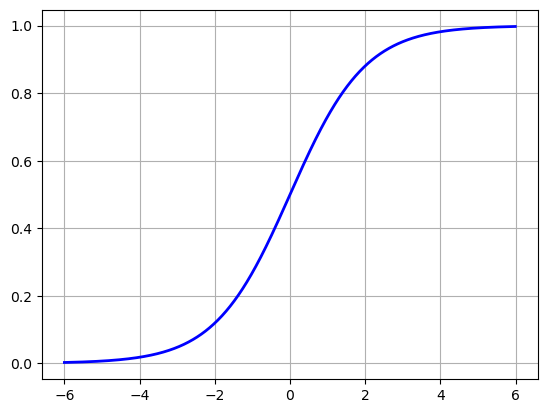

In [8]:
#Probamos la función de activacion sigmoid sobre inputs arbitrarios / Test of sigmoidal activation function
testInput= np.arange(-6, 6, 0.01)
plt.plot(testInput, NN.sigmoid(testInput), c="blue", lw=2)
plt.grid(1)

In [9]:
#Probamos el método forward de nuestra clase sobre los datos reales de la matriz de inputs X (hrs sueño/estudio)
#para predecir Y (Calificación)
#Test of our forward propagation method with our real data of X (hrs sleep/study) to predict Y (grade)
yHat= NN.forward(x)

print("\nPredicted Y values are:\n", yHat, "\n----------------------------------------------------\n")
print("Real Y values are:\n", y, "\n----------------------------------------------------\n")
print("Difference between (yReal - yPred) is:\n", y - yHat, "\n")


Predicted Y values are:
 [[0.50757541]
 [0.44533843]
 [0.47844032]] 
----------------------------------------------------

Real Y values are:
 [[0.75]
 [0.82]
 [0.93]] 
----------------------------------------------------

Difference between (yReal - yPred) is:
 [[0.24242459]
 [0.37466157]
 [0.45155968]] 



### Los estimados del modelo son muy malos porque aún no entrenamos la red!

#### Prediction of the model is really bad because we haven't trained it yet!

##  [Parte 3: Descenso por Gradiente]

Para mejorar nuestro modelo primero debemos cuantificar el error de nuestras predicciones. Esto lo haremos mediante una **función de costo** que nos permite expresar que tan equivocado o costoso es nuestro modelo dado nuestros casos ejemplo. 

<img src="ANN16.png" width="500" >

<br>Una forma de computar un costo es tomar cada valor de error ($y - \hat{y}$), exponenciarlo al cuadrado y sumar todos los errores. 

$$J = cost = (y1 - \hat{y}1)^2 + (y2 - \hat{y}2)^2 + ... + (yn - \hat{y}n)^2$$

<br> Simplificando:
$$J = \sum \frac{1}{2}e^2$$
$$J = \sum \frac{1}{2}(y - \hat{y})^2$$

<br> Ahora que tebemos el valor del costo, nuestro trabajo es **minimizarlo**. Ya que:

### Entrenar una red = Minimizar una función de costo

El costo es la función de dos cosas: nuestros ejemplos y los pesos de nuestras sinapsis. Por esto, se minimiza el costo cambiando los **pesos**. Conceptualmente significa que debemos encontrar una combinación de pesos $W$ que reducirán nuestro costo $J$ lo más posible.
<br><br> Lo que se podría hacer es probar todas las 9 combinaciones de $W$ hasta que hallemos la óptima, sin embargo, sufriríamos de la **maldición de la dimensionalidad**, ya que para encontrar la combinación precisa, deberíamos probar $1,000^9$ valores de combinaciones de $W$ lo que gastaría mucho tiempo (más tiempo de lo que lleva existiendo el Universo) y recursos. Por lo tanto, esté método de **"Intentarlo Todo"** u **"Optimización Bruta"** claramente no funcionará.
<br> <br> Así que busquemos otro método más inteligente. Evaluemos la función de costo para un solo valor específico de W:

In [10]:
weightsToTry= np.linspace(-10, 10, 1000)
costs = np.zeros(1000)

for i in range(len(weightsToTry)):
    NN.W1[0,0]= weightsToTry[i]
    yHat= NN.forward(x)
    costs[i]= 0.5* sum((y -yHat)**2)

C:\Users\a.camposperez\AppData\Local\Temp\ipykernel_32036\2462720705.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costs[i]= 0.5* sum((y -yHat)**2)


Text(0, 0.5, 'Cost')

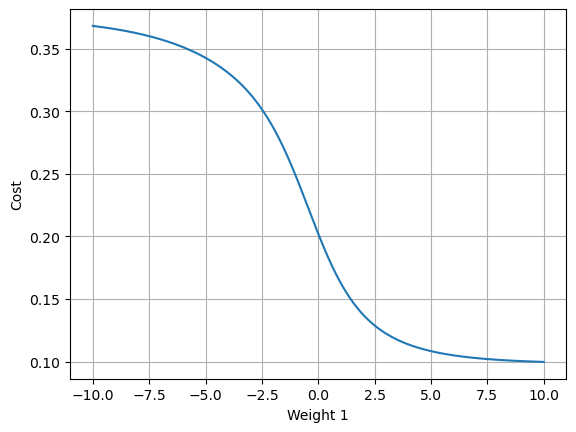

In [11]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.xlabel("Weight 1")
plt.ylabel("Cost")

In [12]:
NN.W1[0,0] = 1.1
yHat = NN.forward(x)

In [13]:
0.5*sum((y-yHat)**2)

array([0.15950996])

Esto no nos dice mucho, pero intentemos buscar más información, por ejemplo, averiguar que valor de W hace que el costo baje a partir del punto $W1 = 1.1$, es decir, cuál es el camino "downhill". 

<img src="ANN17.png" width="350" height="275">

<br> Para poder realizar esto, podemos pensar que nuestra función $J$ de costo es una ecuación grande conformada por las demás 4 ecuaciones que rigen a nuestra red:

$$J = \sum \frac{1}{2}(y - f(f(XW^{(1)})W^{(2)}))^2$$

<br>En base a estas ecuaciones queremos buscar cual es la tasa de cambio de $J$ con respecto a $$W^{(1)}$$ y $$W^{(2)}$$, es decir, la derivada: $$\frac{dJ}{dW}$$. Sin embargo, en este caso estamos considerando un peso a la vez, por lo que es una derivada parcial: $$\frac{\partial{J}}{\partial{W}}$$

<br>Así, podemos encontrar la tasa de cambio de $J$ con respecto a $W$ para cualquier valor de $W$. Si es positivo el valor de la derivada entonces la función de costo está yendo hacia arriba, si es negativa va hacia abajo. 

<img src="ANN18.png" width="400" height="250">

De esta forma podemos acelerar el proceso ya que podemos saber en que dirección la función de costo disminuye. Podemos salvar aún más tiempo al tomar pasos de manera iterativa hacia abajo y detenernos cuando el costo deja de disminuir. 

<img src="ANN19.png" width="400" height="250">

<h3>Este método se conoce como Gradient Descent.</h3>


Tiene una capacidad increíble de buscar valores óptimos de $W$ en altas dimensiones. De hecho, toma menos de 100 evaluaciones lograr lo que se lograría con $10^{27}$ evaluaciones mediante el método de "Fuerza Bruta".

Su único reto es cuando las funciones de costo no van en una sola dirección, es decir, que ondulean hacia arriba y hacia abajo: son **No-Convexas**. En este caso, el algoritmo podría estancarse en un **Mínimo Local** en lugar del **Mínimo Global** ideal.

<img src="ANN20.png" height="150">

Una de las razones para elegir que la función de costo se expresara como la suma cuadrática de errores fue para explotar la naturaleza convexa de las ecuaciones cuadráticas (parábolas). De hecho, las versiones de alta dimensión de $f(x) = x^{2}$ también son convexas en el plano. 

<img src="ANN21.png" width="400">

También hay variantes del algoritmo de **Gradient Descent** en los que el cómo usemos los valores $X$ ejemplo determinará la solución, inclusive cuando trabajamos con funciones de costo no-convexas. Esta variante se llama **Stochastic Gradient Descent**. 

En este caso usaremos la versión clásica del algoritmo, llamada **Batch Gradient Descent**, en la que se usan todos los valores de $X$ al mismo tiempo y la función de costo es convexa.

<img src="ANN22.png" width="500">



## [Parte 4: Propagación hacia atrás]
##### Backpropagation
Nosotros tenemos dos matrices de pesos: $W^{(1)}$ y $W^{(2)}$; por ende, calcularemos ambas derivadas parciales independientemente. Debemos tener tantos gradientes como valores de $W$, así que al final tendremos dos matrices con los mismos tamaños que las de $W^{(1)}$ y $W^{(2)}$.
<table><tr>
<td> <img src="ANN23.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="ANN24.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>
<br></br>

> Las siguientes son las ecuaciones que nos permitirán actualizar las matrices de pesos de las capas de nuestra red ($W^{(1)}$ y $W^{(2)}$) eficientemente:

>> Para calcular la tasa de cambio de $J$ con respecto a los pesos de la segunda capa ($W^{(2)}$) o gradiente, usamos:

$$ \frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^T \delta^{(3)} $$

donde $a^{(2)}$ es la matriz de actividad de las sinapsis y $\delta^{(3)}$ es nuestro error propagado hacia atrás,

$$ \delta^{(3)} = -(y - \hat{y}) f'(z^{(3)}) $$

En términos simples, cada instancia que nuestro algoritmo ve, tiene un costo y un gradiente. El gradiente de cada ejemplo "jala" nuestro algoritmo de Gradient descent en una dirección, por ende, cada instancia tiene un rol en qué dirección es cuesta abajo (down-hill). Al aplicar **Batch Gradient Descent**, sumamos el rol del gradiente de cada instancia, a al vector resultante lo tomamos como descenso y nos vemos en esa dirección. 

<table><tr>
<td> <img src="ANN28.png" alt="Drawing" style="width: 325px;"/> </td>
<td> <img src="ANN29.png" alt="Drawing" style="width: 325px;"/> </td>
<td> <img src="ANN30.png" alt="Drawing" style="width: 325px;"/> </td>
</tr></table>

<br></br>
>> Para calcular la tasa de cambio de $J$ con respecto a los pesos de la primera capa ($W^{(1)}$) o gradiente, usamos:

$$ \frac{\partial J}{\partial W^{(1)}} = X^T \delta^{(2)} $$

<center>donde,</center>

$$ \delta^{(2)} = \delta^{(3)} (W^{(2)})^T f'(z^{(2)}) $$


***
En terminos simples, con estos cálculos estamos propagando hacia atrás (**backpropagating**) el error a cada peso (Weight). Al multiplicar con la actividad en cada sinapsis, los pesos (W) que contribuyeron más al error total van a tener activaciones más grandes, dando como resultado valores más grandes de $\frac{\partial J}{\partial W}$, y van a cambiar más al ejecutar el algoritmo de **Gradient Descent**. 

<table><tr>
<td> <img src="ANN25.png" alt="Drawing" style="width: 325px;"/> </td>
<td> <img src="ANN26.png" alt="Drawing" style="width: 325px;"/> </td>
<td> <img src="ANN27.png" alt="Drawing" style="width: 325px;"/> </td>
</tr></table>

In [18]:
def sigmoidPrime(self, z):
    #Derivada de la funcion sigmoide / Derivative of Sigmoid Function (Gradient Sigmoid)
    return np.exp(-z)/((1+np.exp(-z))**2)

Neural_Network.sigmoidPrime = sigmoidPrime #agregar a clase como metodo de instancia / add it to class as instance method

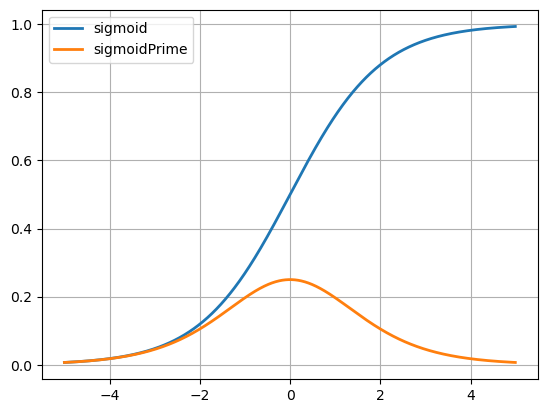

In [19]:
#sigmoid prime should be largest where sigmoid is steepest (activation function), which is at x=0
testValues = np.arange(-5, 5, 0.01)
plt.plot(testValues, NN.sigmoid(testValues), linewidth = 2)
plt.plot(testValues, NN.sigmoidPrime(testValues), linewidth = 2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

In [20]:
def costFunction(self, X, y):
    #Computar costo dados X,y, usando los pesos en la clase / Compute cost given X,y, using weights stored in class
    self.yHat = self.forward(X)
    J = 0.5*sum((y-self.yHat)**2)
    return J

Neural_Network.costFunction = costFunction  #agregar a clase como metodo de instancia / add it to class as instance method

In [21]:
def costFunctionPrime(self, X, y):
    # Cálculo de derivadas con respecto a W1 y W2 para X,y dados
    # Compute the derivative with respecto to W1 and W2 for a given X,y
    self.yHat = self.forward(X)
    
    delta3= np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)
    
    delta2= np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    dJdW1= np.dot(X.T, delta2)
    return dJdW1, dJdW2
    
Neural_Network.costFunctionPrime = costFunctionPrime  #agregar a clase como metodo de instancia / add it to class as instance method

In [22]:
#Calculamos los gradientes / Compute gradients 
NN = Neural_Network()
dJdW1, dJdW2 = NN.costFunctionPrime(x,y)

cost1 = NN.costFunction(x,y)
print(f"Costo inicial: {cost1}")

Costo inicial: [0.2447609]


In [23]:
print("Gradientes: ", dJdW1, "\n", dJdW2)

Gradientes:  [[ 0.01338198  0.07260335 -0.06264475]
 [ 0.01062674  0.06011338 -0.04501166]] 
 [[-0.17232529]
 [-0.14807042]
 [-0.13971555]]


In [24]:
#Podemos incrementar el costo al sumar nuestra derivada a todos nuestros pesos con un escalar
#Increase cost by adding our derivative *scalar to all our Weights 
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W1 = NN.W1 + scalar*dJdW1

cost2 = NN.costFunction(x,y)

print(cost1, cost2)  #el costo incrementó / Cost increased

[0.2447609] [0.33968992]


In [25]:
#Podemos hacer lo opuesto al substraer el valor del gradiente a nuestros pesos.
#We can do the opposite by substracting the value of the gradient to our Weights
dJdW1, dJdW2 = NN.costFunctionPrime(x,y)

NN.W1 = NN.W1 - scalar*dJdW1
NN.W1 = NN.W1 - scalar*dJdW1

cost3 = NN.costFunction(x,y)

print(cost1, cost3)  #el costo disminuyó / Cost decreased

[0.2447609] [0.23943901]


### Este paso es el punto clave del algoritmo de **Gradient Descent**.

## [Parte 5: Verificación Numérica del Gradiente]

Es dificil detectar errores en el cálculo de los gradientes, porque la red puede seguir funcionando con estos errores. Esto es uno de los problemas más comúnes al construir redes complejas.

Para esto lo mejor es probar el código para la computación de gradientes, usando la **Verificación Numérica del Gradiente**.

La **verificación numérica del gradiente** es una técnica para comprobar si el cálculo del gradiente en una red neuronal está implementado correctamente.

#### ¿Cómo funciona?

Se basa en la definición de derivada:

$$ 
\frac{\partial J}{\partial x} \approx \frac{J(x + \epsilon) - J(x - \epsilon)}{2\epsilon} 
$$

donde $ \epsilon $ es un número muy pequeño (por ejemplo, $ 10^{-5} $).

El procedimiento es el siguiente:

1. **Tomamos un parámetro** $ x $ del modelo (como un peso de la red neuronal $ W $).
2. **Calculamos la función de costo** dos veces:
   - Una vez con $ x + \epsilon $
   - Otra con $ x - \epsilon $
3. **Usamos la ecuación anterior** para estimar el gradiente numérico.
4. **Comparamos este gradiente con el que calculamos analíticamente** usando *backpropagation*.
5. **Si son similares**, todo está bien. **Si son muy diferentes**, hay un error en la implementación del gradiente.



In [26]:
#Ejemplo / Example
def f(x):
    return x**2

In [27]:
epsilon = 1e-5
xx = 1.5
numericGradient = (f(xx+epsilon) - f(xx-epsilon))/(2*epsilon)  #aproximacion numerica/ numerical approximation

In [28]:
# Comparar el resultado obtenido numericamente con el de la derivada simbolica (2x)
# Compare the numerical result with the symbolic derivative (2x) 
numericGradient, 2*xx  # Los resultados deben ser similares / results should be similar

(3.000000000019653, 3.0)

### Esto es un ejemplo clave de como funciona la **verificación númerica del gradiente**

In [29]:
# funciones de ayuda en la clase NN para interactuar con otros metodos/clases
# Helper functions in NN class for interacting with other methods/classes

def getParams(self):
    # Convertir W1 y W2 en un vector
    # Get W1 andf W2 as vector
    params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
    return params

def setParams(self, params):
    # Set W1 y W2 usando un solo vector de parametros
    # Set W1 and W2 using single parameter vector
    W1_start = 0
    W1_end = self.hiddenLayerSize * self.inputLayerSize
    self.W1 = np.reshape(params[W1_start:W1_end],
                         (self.inputLayerSize, self.hiddenLayerSize))
    W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
    self.W2 = np.reshape(params[W1_end:W2_end],
                         (self.hiddenLayerSize, self.outputLayerSize))
    
def computeGradients(self, X, y):
    dJdW1, dJdW2 = self.costFunctionPrime(X,y)
    return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

Neural_Network.getParams = getParams  #agregar a clase como metodo de instancia / add it to class as instance method
Neural_Network.setParams = setParams  #agregar a clase como metodo de instancia / add it to class as instance method
Neural_Network.computeGradients = computeGradients  #agregar a clase como metodo de instancia / add it to class as instance method

In [30]:
# Funcion para verificar numericamente el gradiente
# Function to compute the numerical gradient for checking

def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-5

    for p in range(len(paramsInitial)):
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(x,y)

        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X,y)

        #Calculamos gradiente numérico / compute numerical gradient or slope between two loss values
        numgrad[p] = (loss2-loss1) / (2*e)

        perturb[p] = 0

    #Regresamos los Parametros al valor original / return Params to original value
    N.setParams(paramsInitial)

    return numgrad

In [31]:
NN = Neural_Network()

In [32]:
numgrad = computeNumericalGradient(NN, x, y) #numerical gradient / gradiente calcuado numéricamente

grad = NN.computeGradients(x,y) # gradiente calculado con derivadas / derivative gradient

C:\Users\a.camposperez\AppData\Local\Temp\ipykernel_32036\3327139446.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  numgrad[p] = (loss2-loss1) / (2*e)


In [ ]:
numgrad #gradiente calculado numéricamente / numerical gradient

array([ 0.03912465,  0.05411166, -0.00919722,  0.03217507,  0.04390231,
       -0.00474861, -0.11390458, -0.10603956, -0.26900748])

In [ ]:
grad  #gradiente calculado con la derivada / derivative gradient

array([ 0.03912465,  0.05411166, -0.00919722,  0.03217507,  0.04390231,
       -0.00474861, -0.11390458, -0.10603956, -0.26900748])

In [37]:
# Compara la similitud entre ambos gradientes, un resultado del orden de 1e-8 indica que los gradientes estan siendo correctamente calculados
# Compare similitude between both gradients, small number (1e-8) indicates the gradients are being correctly calculated
np.linalg.norm(grad - numgrad) / np.linalg.norm(grad + numgrad)

1.5584229910385458e-11

## [Parte 6: Entrenamiento de la Red]

Vamos a entrenar nuestra red usando **Gradient Descent**. La implementación de este algoritmo puede ser compleja al aumentar el número de unidades por capa y el número de capas en la Red. 

Podemos encontrar los siguientes problemas con Gradient Descent si solo avanzamos cuesta abajo con pasos del mismo tamaño:
1. Quedarnos atascados en un mínimo local
2. Quedarnos atascados en un lugar plano
3. Nos movemos demasiado lento y nunca llegamos al mínimo
4. O nos movemos muy rápido y nos salimos del mínimo

<img src="ANN31.png" width="500">

El algoritmo de Gradient Descent, si bien es muy poderoso, no garantiza que va a converger en una buena solución, en una solución en $ x $ número de iteraciones o encontrar una solución.

Por esto es importante optimizar la función. Nosotros usaremos:

El algoritmo de optimización **Quasi-Newton (BFGS)** es una técnica iterativa utilizada para encontrar los mínimos de funciones no lineales. Es un algoritmo de optimización de segundo orden, lo que significa que utiliza información sobre la segunda derivada (o sus aproximaciones) de la función objetivo para mejorar la búsqueda de la solución óptima. Es decir, estimaremos la segunda derivada o curvatura de la función de costo, y con esta información haremos "movimientos" más informados cuesta-abajo (*downhill*). ***Esto nos permite encontrar más soluciones y más rápido que el algoritmo básico de Gradient Descent.***

In [43]:
class trainer(object):
    def __init__(self, N):
        self.N = N #referencia local a Neural Network

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
    
    def train(self, X,y):
        self.X = X
        self.y = y

        self.J = []

        params0 = self.N.getParams()

        options = {'maxiter':200, 'disp': True}
        _res = optimize.minimize(self.costFunctionWrapper, params0,
                                 jac = True, method = 'BFGS', args = (X,y),
                                 options= options, callback = self.callbackF)
        
        #Actualizar parametros random con los entrenados
        #Replace random parameters with trained parameters
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [44]:
NN = Neural_Network()

In [45]:
T = trainer(NN)

In [46]:
T.train(x,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 36
         Function evaluations: 40
         Gradient evaluations: 40


Text(0.5, 0, 'Iterations')

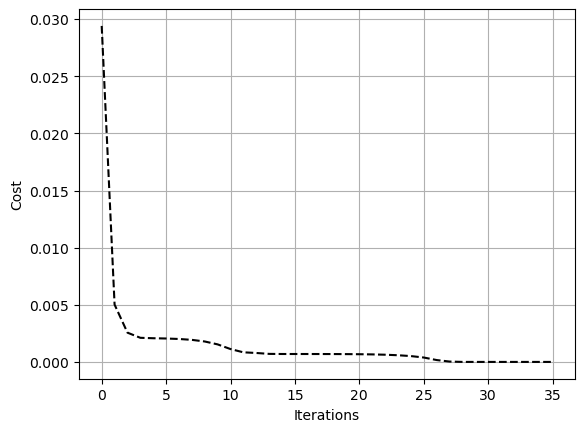

In [ ]:
plt.plot(T.J, '--', color = 'black')
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Iterations') # aqui podemos ver cuantas iteraciones necesitamos para llegar al costo minimo (ie la solucion)

In [ ]:
NN.costFunctionPrime(x,y)  #valores de costo pequenios

(array([[-3.11968819e-06, -7.74496228e-07,  2.65046704e-06],
        [-2.05912637e-06, -4.68155122e-07,  1.81581417e-06]]),
 array([[2.36869903e-06],
        [5.21092857e-06],
        [6.69989631e-06]]))

In [51]:
# La red esta entrenada para predecir la calificación que se sacará basado en las horas de dormir y de estudiar
# The ANN is trained to predict the score you will get based on how many hours you slept and studied
NN.forward(x)

array([[0.75000614],
       [0.82005222],
       [0.92999601]])

In [ ]:
y  #Podemos ver que los resultados son muy cercanos a la realidad

array([[0.75],
       [0.82],
       [0.93]])

Vamos a poner a prueba la Red con varias combinaciones de horas de sueño y de estudio:

In [53]:
hoursSleep = np.linspace(0,10, 100)
hoursStudy = np.linspace(0,5, 100)

#Normalizamos la data
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

a, b = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:,1] = b.ravel()

In [54]:
allOutputs = NN.forward(allInputs)

Text(0.5, 0, 'Test Score')

<Figure size 640x480 with 0 Axes>

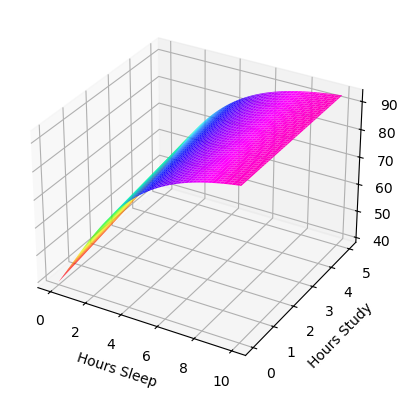

In [ ]:
#3d plot

yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

from mpl_toolkits.mplot3d import Axes3D

%matplotlib qt
#%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Corrected this line

surf = ax.plot_surface(xx, yy, 100 * allOutputs.reshape(100,100), cmap='gist_rainbow')

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

## [Parte 7: Overfitting]